<a href="https://colab.research.google.com/github/swartn/cmip6-test/blob/master/cmip6_fgco2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Environment setup
! pip install --upgrade xarray zarr gcsfs cftime nc-time-axis bokeh intake-esm cmip6_preprocessing 

     |████████████████████████████████| 655kB 2.7MB/s 
     |████████████████████████████████| 3.3MB 78kB/s 
     |████████████████████████████████| 317kB 24.1MB/s 
Requirement already up-to-date: bokeh in /usr/local/lib/python3.6/dist-packages (1.4.0)
     |████████████████████████████████| 3.8MB 34.2MB/s 
     |████████████████████████████████| 40kB 1.7MB/s 
     |████████████████████████████████| 3.1MB 54.4MB/s 
     |████████████████████████████████| 4.1MB 55.2MB/s 
  Created wheel for zarr: filename=zarr-2.4.0-cp36-none-any.whl size=127066 sha256=5173b1c1b4ef7523750cc7b3b059105d71fc6ead34b92f75fa91faef56386a20
  Stored in directory: /root/.cache/pip/wheels/e1/5b/25/24c685604b91139aba00a5b6299b53e7a0661f737f27782559
  Created wheel for asciitree: filename=asciitree-0.3.3-cp36-none-any.whl size=5037 sha256=51f508f9e9415b17b45c634f6311f376d1372a6d2f5648fd23e5550f4c704b3b
  Stored in directory: /root/.cache/pip/wheels/1d/d9/58/9808b306744df0208fccc640d3d9952a5bc7468502d42897d5
  Creat

In [5]:
!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local

--2020-03-06 14:06:17--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M  87.4MB/s    in 0.6s    

2020-03-06 14:06:18 (87.4 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk

In [6]:
!conda install -y -c conda-forge esmpy=7.1.0 xesmf

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [0]:
import numpy as np
import pandas as pd
import xarray as xr
import warnings
import matplotlib.pyplot as plt
import gcsfs
import intake
import xesmf as xe
%matplotlib inline

In [9]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

pangeo-cmip6-ESM Collection with 235624 entries:
	> 15 activity_id(s)

	> 32 institution_id(s)

	> 69 source_id(s)

	> 101 experiment_id(s)

	> 135 member_id(s)

	> 29 table_id(s)

	> 313 variable_id(s)

	> 10 grid_label(s)

	> 235624 zstore(s)

	> 60 dcpp_init_year(s)

In [0]:
from cmip6_preprocessing.preprocessing import combined_preprocessing, replace_x_y_nominal_lat_lon, rename_cmip6

def wrapper(ds):
    ds = ds.copy()
    ds = rename_cmip6(ds)
    ds = replace_x_y_nominal_lat_lon(ds)
    return ds

In [11]:

# lets load a bunch more models this time
# load a few models to illustrate the problem
query = dict(experiment_id=['ssp585', 'historical'], table_id='Omon', 
             variable_id='fgco2', grid_label=['gn'], member_id=['r1i1p1f1', 'r1i1p2f1'])
cat = col.search(**query)

print(cat.df['source_id'].unique())
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True}, preprocess=combined_preprocessing)

['BCC-CSM2-MR' 'BCC-ESM1' 'CanESM5-CanOE' 'CanESM5' 'ACCESS-ESM1-5'
 'IPSL-CM6A-LR' 'MPI-ESM1-2-HR' 'GISS-E2-1-G-CC' 'CESM2-FV2'
 'CESM2-WACCM-FV2' 'CESM2-WACCM' 'CESM2']
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 20 group(s)


In [0]:
ssp585_dict = {} # dictionary that will hold spliced DataArrays
for name, ds in dset_dict.items(): # Loop through dictionary
    model_name = name.split(".")[2]
    if ('ssp585' not in name): continue
    ssp585_dict[model_name] = ds

his_dict = {} # dictionary that will hold spliced DataArrays
for name, ds in dset_dict.items(): # Loop through dictionary
    model_name = name.split(".")[2]
    if ('historical' not in name) or (model_name not in ssp585_dict.keys()): continue
    his_dict[model_name] = ds

In [13]:
print(his_dict.keys())
print(ssp585_dict.keys())

dict_keys(['IPSL-CM6A-LR', 'ACCESS-ESM1-5', 'MPI-ESM1-2-HR', 'CESM2-WACCM', 'BCC-CSM2-MR', 'CESM2', 'CanESM5-CanOE', 'CanESM5'])
dict_keys(['IPSL-CM6A-LR', 'ACCESS-ESM1-5', 'MPI-ESM1-2-HR', 'CanESM5-CanOE', 'CESM2', 'CESM2-WACCM', 'BCC-CSM2-MR', 'CanESM5'])


In [14]:
# setup a common 1 degree global grid 
ds_out = xe.util.grid_global(1, 1)
ds_out 

<xarray.Dataset>
Dimensions:  (x: 360, x_b: 361, y: 180, y_b: 181)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [0]:
kgs_to_molyr=1000./12.*3600*24*365

In [29]:
 rm_his_dict = {}
for name, ds in his_dict.items():
    print(name)
    scale=1 if name != 'BCC-CSM2-MR' else -1 *12/44
    regridder = xe.Regridder(ds, ds_out, 'bilinear', ignore_degenerate=True)
    ds_in = ds.sel(time=slice('1980-01-01','2014-12-31')).mean(dim='time')*kgs_to_molyr*scale
    dsrm = regridder(ds_in).compute()
    rm_his_dict[name] = dsrm

IPSL-CM6A-LR
Overwrite existing file: bilinear_332x362_180x360.nc 
 You can set reuse_weights=True to save computing time.


/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


using dimensions ('y', 'x') from data variable area as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


ACCESS-ESM1-5
Overwrite existing file: bilinear_300x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


MPI-ESM1-2-HR
Overwrite existing file: bilinear_404x802_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CESM2-WACCM
Overwrite existing file: bilinear_384x320_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


BCC-CSM2-MR
Overwrite existing file: bilinear_232x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CESM2
Overwrite existing file: bilinear_384x320_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CanESM5-CanOE
Overwrite existing file: bilinear_291x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CanESM5
Overwrite existing file: bilinear_291x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [41]:
rm_ssp585_dict = {}
for name, ds in ssp585_dict.items():
    print(name)
    scale=1 if name != 'BCC-CSM2-MR' else -1 *12/44.
    regridder = xe.Regridder(ds, ds_out, 'bilinear', ignore_degenerate=True)
    ds_in = ds.sel(time=slice('2045-01-01','2054-12-31')).mean(dim='time')*kgs_to_molyr*scale
    dsrm = regridder(ds_in).compute()
    rm_ssp585_dict[name] = dsrm

IPSL-CM6A-LR
Overwrite existing file: bilinear_332x362_180x360.nc 
 You can set reuse_weights=True to save computing time.


/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


using dimensions ('y', 'x') from data variable area as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


ACCESS-ESM1-5
Overwrite existing file: bilinear_300x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


MPI-ESM1-2-HR
Overwrite existing file: bilinear_404x802_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CanESM5-CanOE
Overwrite existing file: bilinear_291x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CESM2
Overwrite existing file: bilinear_384x320_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CESM2-WACCM
Overwrite existing file: bilinear_384x320_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


BCC-CSM2-MR
Overwrite existing file: bilinear_232x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.8/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


CanESM5
Overwrite existing file: bilinear_291x360_180x360.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable fgco2 as the horizontal dimensions for this dataset.


/usr/local/lib/python3.6/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


IPSL-CM6A-LR
ACCESS-ESM1-5
MPI-ESM1-2-HR
CESM2-WACCM
BCC-CSM2-MR
CESM2
CanESM5-CanOE
CanESM5


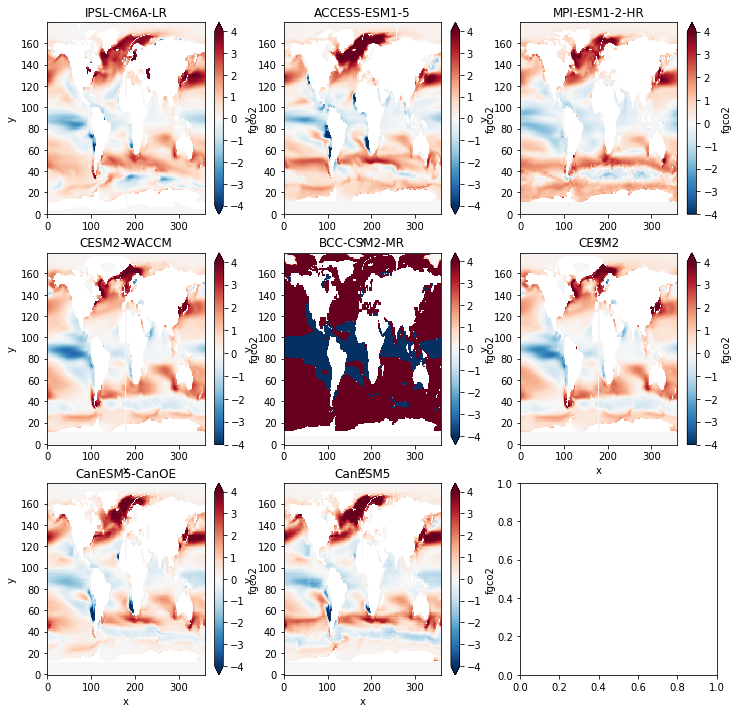

In [27]:
vmin=-4
vmax=4
fig, axa = plt.subplots(3,3, figsize=(12,12))
for i, (name, ds) in enumerate(rm_his_dict.items()):
    print(name)
    scale=1
    ax=axa.flat[i]
    (ds['fgco2'].isel(member_id=0)).plot(ax=ax, cmap='RdBu_r', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    

IPSL-CM6A-LR
ACCESS-ESM1-5
MPI-ESM1-2-HR
CanESM5-CanOE
CESM2
CESM2-WACCM
BCC-CSM2-MR
CanESM5


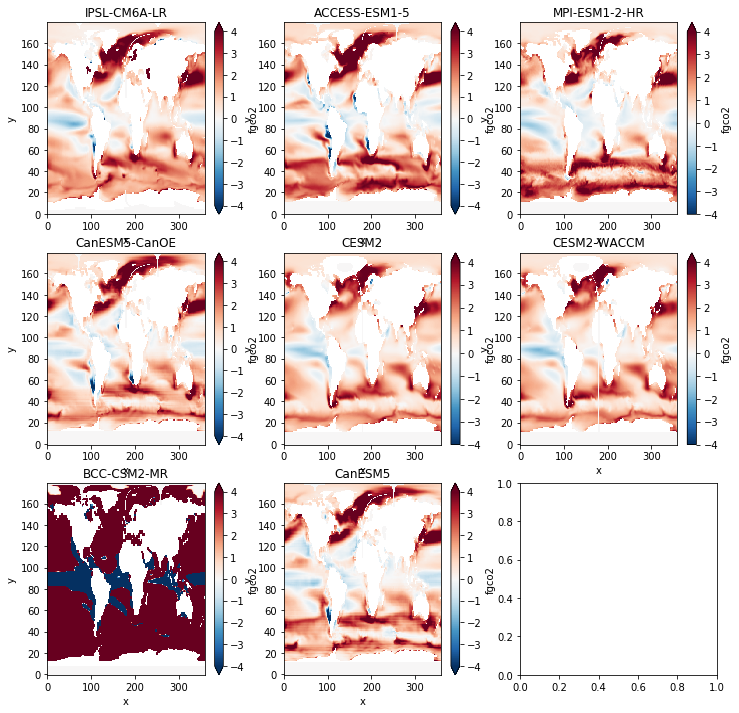

In [43]:
fig, axa = plt.subplots(3,3, figsize=(12,12))
for i, (name, ds) in enumerate(rm_ssp585_dict.items()):
    print(name)
    scale=1
    ax=axa.flat[i]
    (ds['fgco2'].isel(member_id=0)).plot(ax=ax, cmap='RdBu_r', vmin=vmin, vmax=vmax)
    ax.set_title(name)

IPSL-CM6A-LR
ACCESS-ESM1-5
MPI-ESM1-2-HR
CanESM5-CanOE
CESM2
CESM2-WACCM
BCC-CSM2-MR
CanESM5


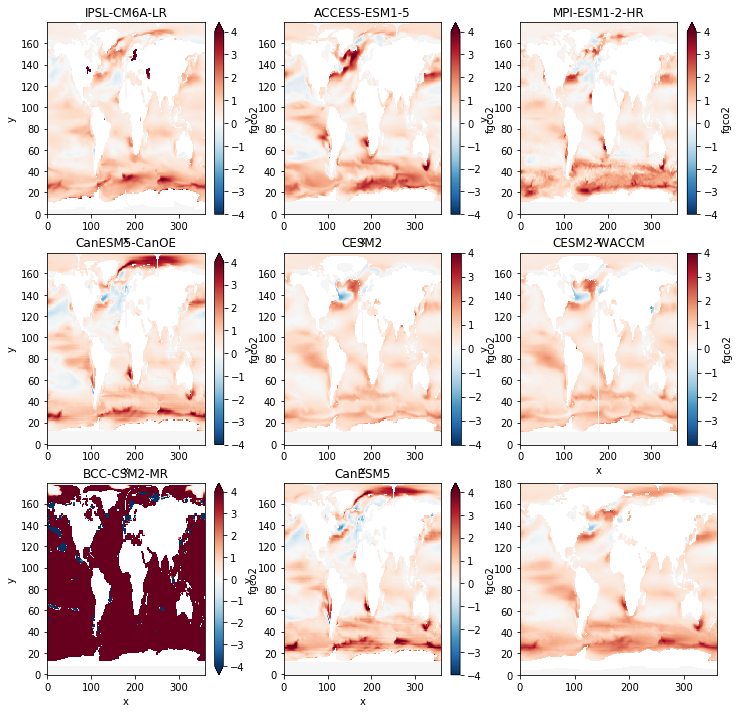

In [66]:
meanf = rm_ssp585_dict['BCC-CSM2-MR']['fgco2'].values*0.0

fig, axa = plt.subplots(3,3, figsize=(12,12))
for i, (name, ds) in enumerate(rm_ssp585_dict.items()):
    print(name)
    ax=axa.flat[i]
    (ds['fgco2'].isel(member_id=0) - rm_his_dict[name]['fgco2'].isel(member_id=0)).plot(ax=ax, cmap='RdBu_r', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    if name != 'BCC-CSM2-MR':
        meanf = meanf + (ds['fgco2'].isel(member_id=0) - rm_his_dict[name]['fgco2'].isel(member_id=0)).compute().values

meanf=meanf/(i-1)
ax = axa.flat[i+1]
ax.pcolormesh(meanf.squeeze(), cmap='RdBu_r', vmin=vmin, vmax=vmax)    

(100, 160)

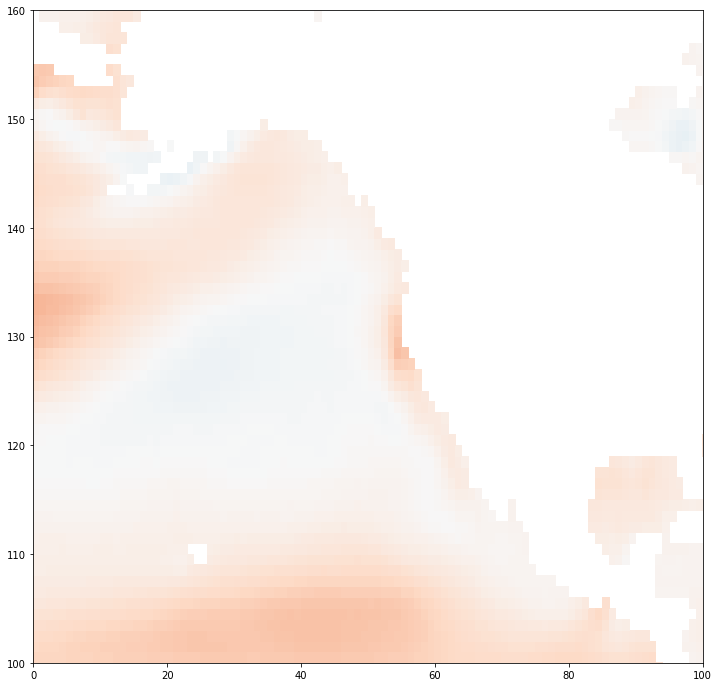

In [71]:
fig = plt.figure(figsize=(12,12))
plt.pcolormesh(meanf.squeeze(), cmap='RdBu_r', vmin=vmin, vmax=vmax)  
plt.xlim([0,100])
plt.ylim([100,160])